# Test set evaluation on stochastic models

The purpose of this experiment is to measure how the **validation accuracy** changes accross a single model trained with different values of **alpha**.

In [1]:
import sys
sys.path.append('..')

from utils.plotting import *

%matplotlib inline

## 1. Compare each each set of experiments

First let's load the baseline.

In [2]:
baseline_loc = '../results/cifar10/seeker/default/baseline.txt'
with open(baseline_loc) as f:
    baseline = float(f.read())
print('Baseline accuracy: {:.2f}%'.format(baseline * 100))

Baseline accuracy: 65.37%


### a) ST1

Text(0.5, 1.0, 'Straight-Through v1')

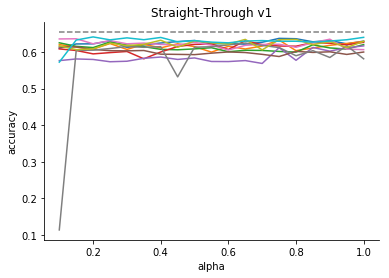

In [3]:
result_dir = '../results/cifar10/hns/stochastic/st1/full_training_10/'
st1 = read_results(result_dir)

plot_all_results(st1, baseline=baseline)
plt.title('Straight-Through v1')

Text(0.5, 1.0, 'Straight-Through v1')

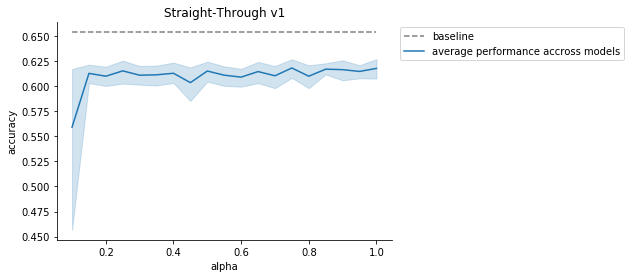

In [8]:
plot_average_results(st1, baseline=baseline)
plt.title('Straight-Through v1')

Pretty standard performance. The models are very low-variance, with the exception of a single model whose performance droped significantly for low alpha (probably it collapsed to masking everything). If the training lasted longer maybe it could have recovered. 

### b) ST2

Text(0.5, 1.0, 'Straight-Through v2')

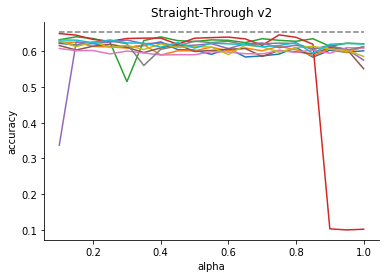

In [6]:
result_dir = '../results/cifar10/hns/stochastic/st2/full_training_10/'
st2 = read_results(result_dir)

plot_all_results(st2, baseline=baseline)
plt.title('Straight-Through v2')

Text(0.5, 1.0, 'Straight-Through v2')

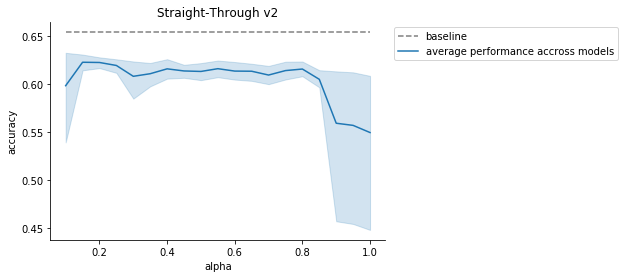

In [9]:
plot_average_results(st2, baseline=baseline)
plt.title('Straight-Through v2')

The model that drops for high values of alpha is very unexpected. Probably the training procedure droped the alpha before it was able to learn to classify properly. Though it did manage to recover later.

### c) SA

#### Rate=0.1

Text(0.5, 1.0, 'Slope-Annealing, Rate=0.1')

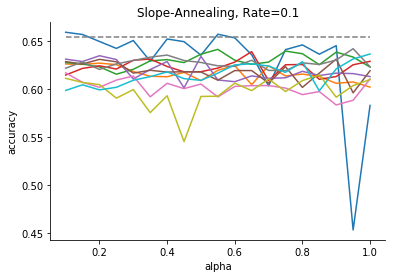

In [15]:
result_dir = '../results/cifar10/hns/stochastic/sa/rate_0.1/full_training_10/'
sa_01 = read_results(result_dir)

plot_all_results(sa_01, baseline=baseline)
plt.title('Slope-Annealing, Rate=0.1')

Text(0.5, 1.0, 'Slope-Annealing, Rate=0.1')

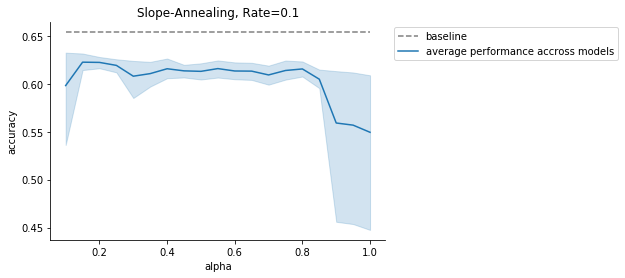

In [16]:
plot_average_results(st2, baseline=baseline)
plt.title('Slope-Annealing, Rate=0.1')

Again, a single model droped a bit during a high value of alpha (though it did recover later).

#### Rate=0.5

#### Rate=1

#### Rate=10

#### Rate=100

### REINFORCE

We know that this estimator doesn't work properly but since we have the logs available we'll plot them too.